In [81]:
import xgboost as xgb
import pandas as pd
import os

In [82]:
#filename = "/Users/annahauk/Desktop/Machine Learning/SP500AdjPrice.csv"
filename = os.path.join(os.getcwd(), "SP500AdjPrice.csv")
df = pd.read_csv(filename, header = 0)

In [83]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol   = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector

remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

#print(len(symbols))
#print(set(industries))

symbol_industry = dict(zip(symbols,industries))

df_industries = pd.DataFrame({'Industry': [symbol_industry[symbol] for symbol in symbols]})
df_industries.index = symbol_industry.keys()
df_industries = df_industries.sort_index()
df_industries.head(10)

,Industry
A,Materials
AAL,Real Estate
AAPL,Information Technology
ABBV,Health Care
ABNB,Information Technology
ABT,Health Care
ACGL,Communication Services
ACN,Information Technology
ADBE,Industrials
ADI,Information Technology


In [84]:
a = len(symbols)

df.index = sorted(symbols)
df = df.drop(columns = "Unnamed: 0", axis = 1)
df

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
A,140.885956,143.133453,142.437317,139.553360,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.062790,132.442917,133.795410
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612
ABBV,151.295471,152.941910,152.177490,149.874420,146.610977,144.405930,146.718781,148.914017,150.776062,150.981857,152.197098,151.138672,153.000702
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,127.485069,128.465866,128.099319,125.741402,125.602715,124.879494,123.423141,123.730255,125.523445,125.949463,126.870819,125.672058,127.683220
ZBH,122.286400,125.497932,123.907082,122.445480,121.212585,121.650070,122.823318,123.539192,125.905579,124.543419,124.712440,123.598854,125.607292
ZBRA,306.059998,309.450012,305.809998,302.160004,307.070007,296.910004,288.190002,284.920013,292.459991,287.739990,294.929993,288.709991,290.839996
ZION,46.931580,47.825329,47.368736,45.114933,45.348087,40.179882,39.198696,29.114870,30.416636,29.833755,31.193810,29.085726,29.318878


In [85]:
df_industries = df.join(df_industries)
df_industries

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20,Industry
A,140.885956,143.133453,142.437317,139.553360,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.062790,132.442917,133.795410,Materials
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000,Real Estate
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612,Information Technology
ABBV,151.295471,152.941910,152.177490,149.874420,146.610977,144.405930,146.718781,148.914017,150.776062,150.981857,152.197098,151.138672,153.000702,Health Care
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,127.485069,128.465866,128.099319,125.741402,125.602715,124.879494,123.423141,123.730255,125.523445,125.949463,126.870819,125.672058,127.683220,Consumer Discretionary
ZBH,122.286400,125.497932,123.907082,122.445480,121.212585,121.650070,122.823318,123.539192,125.905579,124.543419,124.712440,123.598854,125.607292,Health Care
ZBRA,306.059998,309.450012,305.809998,302.160004,307.070007,296.910004,288.190002,284.920013,292.459991,287.739990,294.929993,288.709991,290.839996,Information Technology
ZION,46.931580,47.825329,47.368736,45.114933,45.348087,40.179882,39.198696,29.114870,30.416636,29.833755,31.193810,29.085726,29.318878,Financials


In [86]:
df = df.T
df

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Adj Close 2023-03-02,140.885956,16.120001,145.511978,151.295471,122.379997,101.632233,70.900002,262.179596,333.500000,182.840942,...,112.854477,62.735634,109.543678,37.253830,101.580025,127.485069,122.286400,306.059998,46.931580,167.849579
Adj Close 2023-03-03,143.133453,16.360001,150.617996,152.941910,125.730003,103.434532,71.300003,266.073822,344.040009,184.485214,...,115.262627,63.476681,110.930176,38.301846,103.239075,128.465866,125.497932,309.450012,47.825329,169.820999
Adj Close 2023-03-06,142.437317,16.120001,153.410370,152.177490,126.330002,101.751060,71.699997,266.498810,347.019989,183.762131,...,114.834732,63.427937,111.913521,38.825848,102.891365,128.099319,123.907082,305.809998,47.368736,168.934845
Adj Close 2023-03-07,139.553360,16.360001,151.186447,149.874420,126.940002,99.008003,70.989998,261.131866,344.799988,183.187622,...,112.605705,62.023842,109.750175,38.153538,101.500542,125.741402,122.445480,302.160004,45.114933,166.306290
Adj Close 2023-03-08,140.120193,16.590000,152.452972,146.610977,125.000000,98.433640,70.290001,260.598175,345.839996,184.802185,...,112.983849,62.794144,108.147339,37.520775,101.103165,125.602715,121.212585,307.070007,45.348087,167.909317
Adj Close 2023-03-09,138.161102,15.880000,150.179184,144.405930,119.839996,96.898705,68.379997,256.743469,338.369995,181.820694,...,109.092987,62.647881,107.311501,36.670506,99.821625,124.879494,121.650070,296.910004,40.179882,166.764313
Adj Close 2023-03-10,134.968872,15.460000,148.094894,146.718781,118.300003,96.017357,66.610001,250.012512,329.299988,180.037750,...,107.809311,61.643566,105.984001,36.512310,98.331451,123.423141,122.823318,288.190002,39.198696,160.830124
Adj Close 2023-03-13,135.933502,14.850000,150.059525,148.914017,115.959999,97.235405,65.180000,248.391556,324.269989,180.820267,...,105.729553,63.671700,104.764664,37.125298,97.258522,123.730255,123.539192,284.920013,29.114870,162.701996
Adj Close 2023-03-14,137.634033,14.660000,152.173737,150.776062,116.360001,97.591904,67.339996,249.547958,333.329987,184.812088,...,107.799370,64.320412,105.157997,37.698746,99.245422,125.523445,125.905579,292.459991,30.416636,163.846985
Adj Close 2023-03-15,133.288239,13.860000,152.572647,150.981857,113.580002,96.849197,62.740002,243.311264,333.609985,181.196655,...,104.346359,66.158409,99.926651,36.789146,95.917374,125.949463,124.543419,287.739990,29.833755,162.861298


## <b> XGBOOST to Predict Price of Future Stock

XGBoost refers to the engineering goal to push the limit of computational resources for boosted tree algorithms. There's about 21 trading days in a month but we'll start small. To test: use the root mean square error (RMSE), mean absolute percentage error (MAPE) and mean absolute error (MAE) metrics

### Now let's try it with all stocks

In [87]:
# pip install plotly==5.18.0

In [88]:
import plotly.express as px

In [89]:
import yfinance as yf

# Initializing the Ticker object
JPM_ticker = yf.Ticker('JPM')

# Extracting the history
JP_Morgan_df = JPM_ticker.history(start='2023-03-02', end= '2023-03-20')

In [90]:
JP_Morgan_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-02 00:00:00-05:00,139.143059,139.328910,136.501834,137.998535,11106800,0.0,0.0
2023-03-03 00:00:00-05:00,138.428937,140.610395,138.008307,140.532135,9513100,0.0,0.0
2023-03-06 00:00:00-05:00,140.316899,140.903827,139.553884,139.710403,9261300,0.0,0.0
2023-03-07 00:00:00-05:00,138.918058,139.211529,134.809506,135.601868,11747600,0.0,0.0
2023-03-08 00:00:00-05:00,134.995356,135.572506,133.909523,134.799713,10002500,0.0,0.0
2023-03-09 00:00:00-05:00,133.782337,134.359503,126.406511,127.502121,25888100,0.0,0.0
2023-03-10 00:00:00-05:00,126.152193,132.315013,125.037007,130.740067,37599700,0.0,0.0
2023-03-13 00:00:00-04:00,128.353196,130.965061,126.592384,128.392319,42901100,0.0,0.0
2023-03-14 00:00:00-04:00,132.334583,132.579140,128.431451,131.688950,29648100,0.0,0.0


In [91]:
#import plotly.express as px

# Creating line plot
#fig = px.line(x=JP_Morgan_df.index, y=JP_Morgan_df['Close'])

# Updating layout
#fig.update_layout(
   # title='Close Prices',
   # xaxis_title='Date',
   # yaxis_title='Price',
   # template='plotly_white',
   # xaxis_rangeslider_visible=True
#)

# Showing figure
#fig.show()

In [92]:
JPMdf = df['JPM']

In [93]:
# Creating line plot
fig = px.line(x=JPMdf.index, y=JPMdf)

# Updating layout
fig.update_layout(
    title='Close Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_dark',
    xaxis_rangeslider_visible=True
)

# Showing figure
fig.show()

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [95]:
price_df = df.T
price_df

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
A,140.885956,143.133453,142.437317,139.553360,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.062790,132.442917,133.795410
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612
ABBV,151.295471,152.941910,152.177490,149.874420,146.610977,144.405930,146.718781,148.914017,150.776062,150.981857,152.197098,151.138672,153.000702
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,127.485069,128.465866,128.099319,125.741402,125.602715,124.879494,123.423141,123.730255,125.523445,125.949463,126.870819,125.672058,127.683220
ZBH,122.286400,125.497932,123.907082,122.445480,121.212585,121.650070,122.823318,123.539192,125.905579,124.543419,124.712440,123.598854,125.607292
ZBRA,306.059998,309.450012,305.809998,302.160004,307.070007,296.910004,288.190002,284.920013,292.459991,287.739990,294.929993,288.709991,290.839996
ZION,46.931580,47.825329,47.368736,45.114933,45.348087,40.179882,39.198696,29.114870,30.416636,29.833755,31.193810,29.085726,29.318878


In [96]:
y = price_df['Adj Close 2023-03-20']
X = price_df.drop(columns = 'Adj Close 2023-03-20', axis=1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
X_train.head()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17
GOOG,121.989998,126.599998,125.699997,121.430000,121.449997,117.800003,113.160004,113.639999,112.910004,113.480003,115.529999,113.129997
BA,2485.629883,2497.340088,2520.000000,2474.830078,2459.570068,2422.189941,2421.389893,2429.860107,2427.409912,2415.679932,2413.320068,2365.000000
PFG,83.902840,85.246361,83.435509,82.101723,81.030785,76.824936,74.975136,70.224075,72.070793,68.455956,71.275131,68.750641
IT,329.380005,333.809998,341.420013,334.600006,338.320007,332.320007,314.329987,313.279999,320.320007,310.820007,305.950012,302.489990
MRNA,25.886629,26.313114,26.025484,25.450224,25.182432,24.379055,23.774042,22.762381,23.040091,21.086197,21.830065,21.026688


In [98]:
df_industries

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20,Industry
A,140.885956,143.133453,142.437317,139.553360,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.062790,132.442917,133.795410,Materials
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000,Real Estate
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612,Information Technology
ABBV,151.295471,152.941910,152.177490,149.874420,146.610977,144.405930,146.718781,148.914017,150.776062,150.981857,152.197098,151.138672,153.000702,Health Care
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,127.485069,128.465866,128.099319,125.741402,125.602715,124.879494,123.423141,123.730255,125.523445,125.949463,126.870819,125.672058,127.683220,Consumer Discretionary
ZBH,122.286400,125.497932,123.907082,122.445480,121.212585,121.650070,122.823318,123.539192,125.905579,124.543419,124.712440,123.598854,125.607292,Health Care
ZBRA,306.059998,309.450012,305.809998,302.160004,307.070007,296.910004,288.190002,284.920013,292.459991,287.739990,294.929993,288.709991,290.839996,Information Technology
ZION,46.931580,47.825329,47.368736,45.114933,45.348087,40.179882,39.198696,29.114870,30.416636,29.833755,31.193810,29.085726,29.318878,Financials


In [99]:
it = df_industries[df_industries['Industry'] == 'Information Technology']
it

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20,Industry
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612,Information Technology
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002,Information Technology
ACN,262.179596,266.073822,266.498810,261.131866,260.598175,256.743469,250.012512,248.391556,249.547958,243.311264,249.982880,247.096771,249.617157,Information Technology
ADI,182.840942,184.485214,183.762131,183.187622,184.802185,181.820694,180.037750,180.820267,184.812088,181.196655,184.861603,184.089005,185.287537,Information Technology
ADM,79.668991,80.153519,80.489716,78.838394,79.016388,77.117851,75.802727,76.356468,78.067108,75.951042,75.614845,73.429565,76.069702,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRV,180.066788,180.459961,180.224060,177.294861,174.739182,171.853867,173.592957,170.174072,169.719543,164.512146,170.164200,163.069489,166.705780,Information Technology
TSLA,190.899994,197.789993,193.809998,187.710007,182.000000,172.919998,173.440002,174.479996,183.259995,180.449997,184.130005,180.130005,183.250000,Information Technology
VLTO,180.471634,181.716476,179.047546,176.498123,178.181152,173.351181,168.590912,165.294571,166.818253,162.137680,165.523636,160.355072,162.595779,Information Technology
WDC,38.380001,38.590000,37.779999,37.310001,37.900002,37.060001,36.060001,35.320000,35.290001,34.389999,35.340000,35.080002,35.200001,Information Technology


In [100]:
#JPM = df['JPM'].to_frame().T

In [101]:
it = it.drop(columns="Industry", axis = 1)

In [102]:
y_it = it['Adj Close 2023-03-20']
X_it = it.drop(columns = 'Adj Close 2023-03-20', axis=1)

In [103]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_it, y_it, test_size=0.25, random_state=1234)
X_train2.head()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17
MGM,103.419998,106.430000,102.070000,100.419998,101.550003,100.199997,97.870003,97.000000,97.160004,94.540001,96.489998,94.349998
CINF,283.756012,283.144287,284.624268,279.154572,276.776428,269.453705,273.129944,270.563507,269.651886,267.898010,271.930939,266.996307
HSY,16.510418,16.597929,16.481251,16.452078,16.500694,15.654757,15.460285,15.333881,15.518627,15.324158,15.431116,14.915772
TFX,234.996948,238.506897,232.992706,229.722061,226.930054,228.196442,222.243484,222.393051,226.411545,224.846039,231.556808,235.166458
ZBRA,306.059998,309.450012,305.809998,302.160004,307.070007,296.910004,288.190002,284.920013,292.459991,287.739990,294.929993,288.709991


# For just the IT companies

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print('Begin Implementation...')

# Create GradientBoostingRegressor model objects
gbdt_it_2_model = GradientBoostingRegressor(n_estimators=50, max_depth=2)
gbdt_it_10_model = GradientBoostingRegressor(n_estimators=50, max_depth=10)

# Fit the models
gbdt_it_2_model.fit(X_train2, y_train2)
gbdt_it_10_model.fit(X_train2, y_train2)

# Make predictions using predict
gbdt_it_2_predictions = gbdt_it_2_model.predict(X_test2)
gbdt_it_10_predictions = gbdt_it_10_model.predict(X_test2)

# Calculate RMSE and MAE
rmse_it_2 = np.sqrt(mean_squared_error(y_test2, gbdt_it_2_predictions))
mae_it_2 = mean_absolute_error(y_test2, gbdt_it_2_predictions)

rmse_it_10 = np.sqrt(mean_squared_error(y_test2, gbdt_it_10_predictions))
mae_it_10 = mean_absolute_error(y_test2, gbdt_it_10_predictions)

print('RMSE for max_depth=2:', rmse_it_2)
print('MAE for max_depth=2:', mae_it_2)

print('RMSE for max_depth=10:', rmse_it_10)
print('MAE for max_depth=10:', mae_it_10)

print('End')
# In this modified code, we use the predict method for regression to get the predictions for gbdt_2_model and gbdt_10_model. We then calculate the RMSE and MAE for both models and print the results.


Begin Implementation...
RMSE for max_depth=2: 9.846600624358306
MAE for max_depth=2: 6.746289904563904
RMSE for max_depth=10: 9.476758008194466
MAE for max_depth=10: 6.879971242766416
End


In [105]:
import xgboost
from xgboost import XGBRegressor
model2 = XGBRegressor()
model2.fit(X_it,y_it)
yhat2 = model2.predict(X_test2)
# summarize prediction
print('Predicted: ', yhat2)

Predicted:  [111.70225  185.41843  332.02823  313.59534  138.08342   29.833801
 258.94986   39.50207   76.068695 199.08798  234.16843   28.02466
  57.81999   52.48269   55.12911  123.414955]


In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores2 = cross_val_score(model2, X_it, y_it, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )


Mean MAE: 9.030 (3.947)


In [107]:
model2_hyper = XGBRegressor(n_estimators=10000, max_depth=50, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model2_hyper.fit(X_it,y_it)
cv2 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores2_hyper = cross_val_score(model2_hyper, X_it, y_it, scoring='neg_mean_absolute_error', cv=cv2, n_jobs=-1)
scores2_hyper = absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (scores2_hyper.mean(), scores2_hyper.std()) )

Mean MAE: 9.030 (3.947)


## <b> For consumer Staples

In [108]:
consume = df_industries[df_industries['Industry'] == 'Consumer Discretionary']
consume.shape

(53, 14)

In [109]:
consume = consume.drop(columns="Industry", axis = 1)
y_con = consume['Adj Close 2023-03-20']
X_con = consume.drop(columns = 'Adj Close 2023-03-20', axis=1)

In [110]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_con, y_con, test_size=0.25, random_state=1234)
X_train3.head()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17
HLT,214.967789,215.936279,214.285873,211.489090,209.858459,207.545898,205.519974,206.705887,205.905396,203.019623,202.851624,197.030731
GIS,77.357155,78.765930,78.804794,77.998398,77.920662,76.706184,77.240555,77.250275,78.240913,78.123222,78.319374,75.828064
GE,226.150650,226.926575,228.458817,225.895279,223.017441,218.902023,216.996567,214.894669,215.916153,212.891006,216.132248,214.266068
CHRW,84.001122,83.742599,83.126106,83.195709,83.175835,83.155937,83.404518,83.931519,84.289482,85.701439,85.472733,84.975571
BK,502.790009,503.000000,494.160004,489.589996,481.140015,487.440002,478.239990,488.709991,492.549988,478.000000,488.279999,469.869995


In [122]:
print('Begin Implementation...')

# Create GradientBoostingRegressor model objects
gbdt_con_2_model = GradientBoostingRegressor(n_estimators=50, max_depth=2)
gbdt_con_10_model = GradientBoostingRegressor(n_estimators=50, max_depth=10)

# Fit the models
gbdt_con_2_model.fit(X_train3, y_train3)
gbdt_con_10_model.fit(X_train3, y_train3)

# Make predictions using predict
gbdt_con_2_predictions = gbdt_con_2_model.predict(X_test3)
gbdt_con_10_predictions = gbdt_con_10_model.predict(X_test3)

# Calculate RMSE and MAE
rmse_con_2 = np.sqrt(mean_squared_error(y_test3, gbdt_con_2_predictions))
mae_con_2 = mean_absolute_error(y_test3, gbdt_con_2_predictions)

rmse_con_10 = np.sqrt(mean_squared_error(y_test3, gbdt_con_10_predictions))
mae_con_10 = mean_absolute_error(y_test3, gbdt_con_10_predictions)

print('RMSE for max_depth=2:', rmse_con_2)
print('MAE for max_depth=2:', mae_con_2)

print('RMSE for max_depth=10:', rmse_con_10)
print('MAE for max_depth=10:', mae_con_10)

print('End')

Begin Implementation...
RMSE for max_depth=2: 13.3703143161156
MAE for max_depth=2: 11.907552496423113
RMSE for max_depth=10: 11.46046461262605
MAE for max_depth=10: 8.476376233600705
End


In [120]:
model3 = XGBRegressor()
model3.fit(X_con,y_con)
yhat3 = model2.predict(X_test3)
# summarize prediction
print('Predicted: ', yhat3)

Predicted:  [ 86.853294 270.4221    27.744785 217.57553   86.853294  40.086277
 340.00525  126.21782   16.115725 156.04253  340.00525  131.13072
  25.429499  39.779232]


In [121]:
cv3 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores3 = cross_val_score(model3, X_it, y_it, scoring='neg_mean_absolute_error', cv=cv3, n_jobs=-1)
scores3 = absolute(scores3)
print('Mean MAE: %.3f (%.3f)' % (scores3.mean(), scores3.std()) )


Mean MAE: 9.030 (3.947)


# <b>For all the Stocks</b>

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print('Begin Implementation...')

# Create GradientBoostingRegressor model objects
gbdt_2_model = GradientBoostingRegressor(n_estimators=50, max_depth=2)
gbdt_10_model = GradientBoostingRegressor(n_estimators=50, max_depth=10)
gbdt_100_model = GradientBoostingRegressor(n_estimators=50, max_depth=100)

# Fit the models
gbdt_2_model.fit(X_train, y_train)
gbdt_10_model.fit(X_train, y_train)
gbdt_100_model.fit(X_train, y_train)

# Make predictions using predict
gbdt_2_predictions = gbdt_2_model.predict(X_test)
gbdt_10_predictions = gbdt_10_model.predict(X_test)
gbdt_100_predictions = gbdt_100_model.predict(X_test)


# Calculate RMSE and MAE
rmse_2_all = np.sqrt(mean_squared_error(y_test, gbdt_2_predictions))
mae_2_all = mean_absolute_error(y_test, gbdt_2_predictions)

rmse_10_all = np.sqrt(mean_squared_error(y_test, gbdt_10_predictions))
mae_10_all = mean_absolute_error(y_test, gbdt_10_predictions)

rmse_100_all = np.sqrt(mean_squared_error(y_test, gbdt_10_predictions))
mae_100_all = mean_absolute_error(y_test, gbdt_10_predictions)

print('RMSE for max_depth=2:', rmse_2_all)
print('MAE for max_depth=2:', mae_2_all)

print('RMSE for max_depth=10:', rmse_10_all)
print('MAE for max_depth=10:', mae_10_all)

print('RMSE for max_depth=100:', rmse_100_all)
print('MAE for max_depth=100:', mae_100_all)

print('End')
# In this modified code, we use the predict method for regression to get the predictions for gbdt_2_model and gbdt_10_model. We then calculate the RMSE and MAE for both models and print the results.


Begin Implementation...
RMSE for max_depth=2: 280.51542233164747
MAE for max_depth=2: 30.095767951373837
RMSE for max_depth=10: 278.8085064720605
MAE for max_depth=10: 28.04150805115442
RMSE for max_depth=100: 278.8085064720605
MAE for max_depth=100: 28.04150805115442
End


In [112]:
import xgboost
from xgboost import XGBRegressor


In [113]:
#pip install xgboost

In [114]:
model1 = XGBRegressor()
model1.fit(X,y)
yhat = model1.predict(X_test)
# summarize prediction
print('Predicted: ', yhat)

Predicted:  [  77.96854     48.953247   209.58365     75.11655     67.29187
 3459.7578     156.2018      57.121094    42.076912    66.54065
  103.42318     65.726295   166.47238     67.99846    274.17606
   72.63348    249.75339     15.177965    61.28253    162.07861
   12.579479   213.3992      10.584022    35.365826   197.64969
   98.53439    101.43184     84.77943     71.6012     332.59265
   40.217506   156.9956     375.6658     138.16191    126.87535
   59.78876     68.18287     72.21672     96.225624   106.98687
  316.98505     25.419529    58.177048   180.14899    120.1963
   92.579094    69.49971    101.27984     75.11792    633.1538
  240.49907     77.3995      55.060043   265.13266     36.882202
  164.98163    314.90338     49.1448      74.62417     49.16844
   38.46684    130.6812      90.89639     46.860535   144.0445
   85.12812     84.167564   107.96991     17.645853    52.721046
   94.81738     55.845802   160.9432     549.8703     200.76276
   43.143887   201.86887     

In [115]:
# model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [117]:

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model1, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


Mean MAE: 15.877 (20.708)


In [118]:
import os
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a DMatrix
dtrain = xgb.DMatrix(data=X, label=y)

param = {"max_depth": 2, "eta": 1, "objective": "reg:squarederror"}  # Use regression objective
num_round = 2

print("running cross-validation")

# Perform cross-validation
results = xgb.cv(param, dtrain, num_round, nfold=5, metrics=["rmse", "mae"], seed=0)

# Extract RMSE and MAE from the results
rmse_mean = results["test-rmse-mean"].values[-1]
rmse_std = results["test-rmse-std"].values[-1]
mae_mean = results["test-mae-mean"].values[-1]
mae_std = results["test-mae-std"].values[-1]

print(f"RMSE: {rmse_mean} ± {rmse_std}")
print(f"MAE: {mae_mean} ± {mae_std}")


running cross-validation
RMSE: 155.39756581140233 ± 102.24459005363957
MAE: 57.088810021101835 ± 15.642752403760358


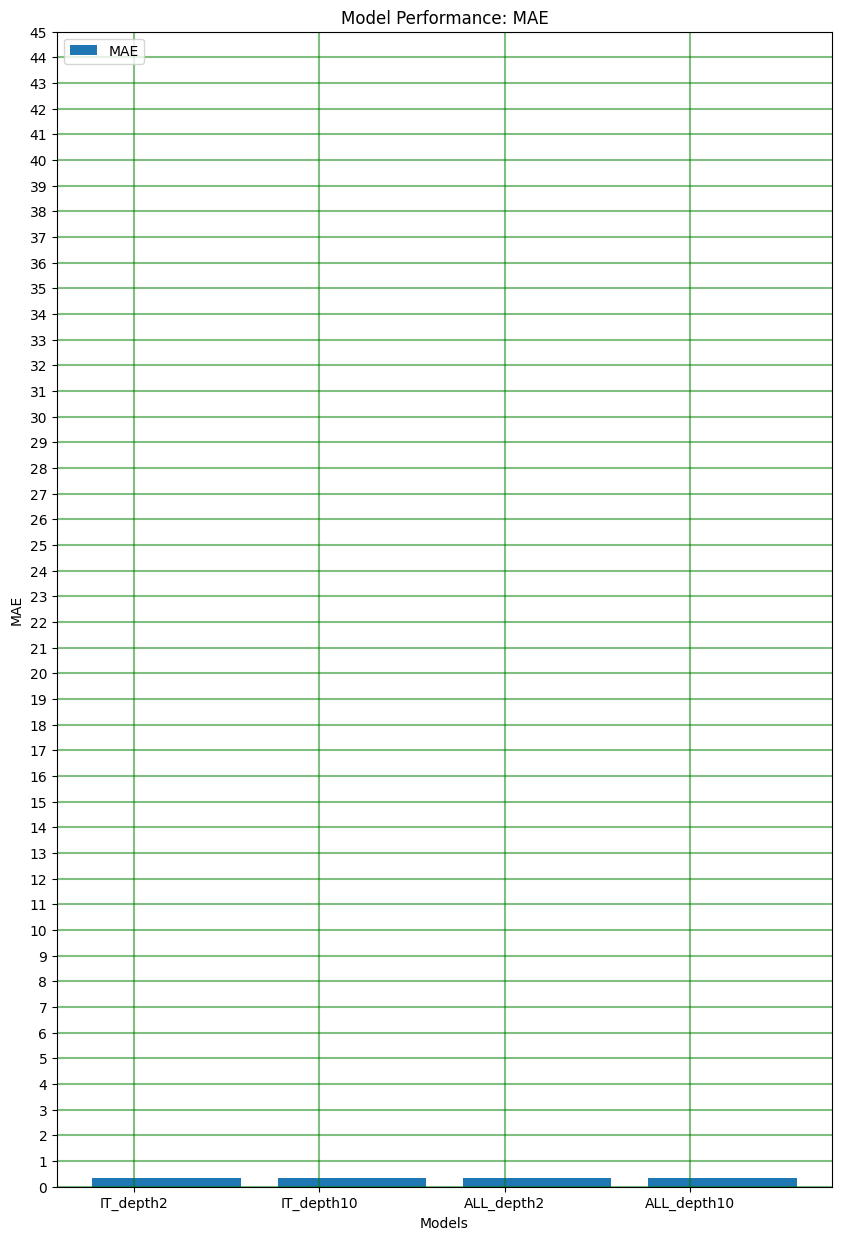

In [123]:
import matplotlib
import matplotlib.pyplot as plt
MAE_Results = [mae_it_2, mae_it_10, mae_2_all, mae_10_all]
labels = ['IT_depth2', 'IT_depth10', 'ALL_depth2', 'ALL_depth10']

rg= np.arange(4)
width = 0.35

plt.figure(figsize=(10, 15))

plt.bar(rg+width, R2_Results, width, label='MAE')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("MAE")
plt.ylim([0,1])

plt.yticks(np.arange(0, 45.1, 1))  # Specify the desired tick positions and labels
plt.yticks()
plt.ylim([0, 45])

plt.grid(color='green', linewidth=1.5, axis='both', alpha=0.5)
plt.title('Model Performance: MAE')
plt.legend(loc='upper left', ncol=2)
plt.show()
 

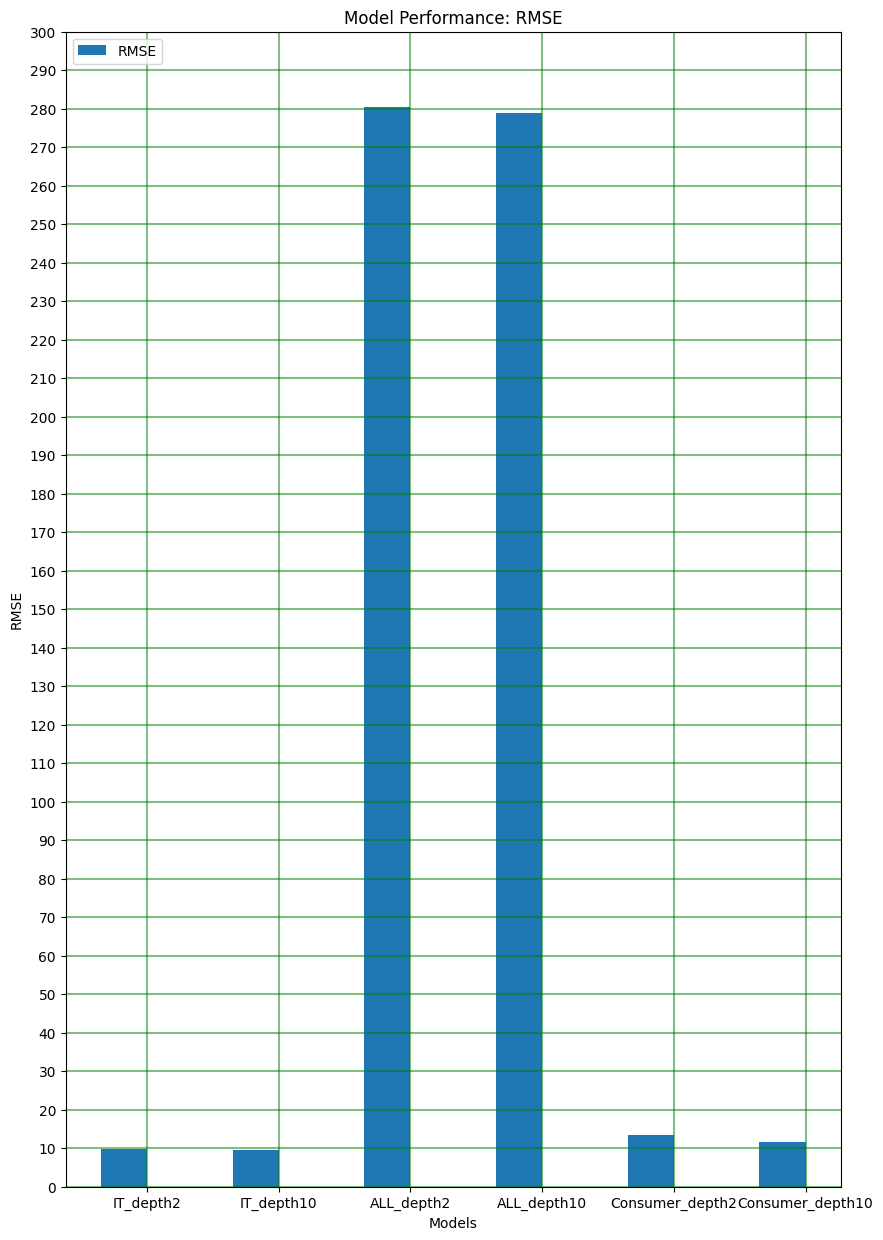

In [130]:
RMSE_Results = [rmse_it_2, rmse_it_10, rmse_2_all, rmse_10_all, rmse_con_2, rmse_con_10]
labels = ['IT_depth2', 'IT_depth10', 'ALL_depth2', 'ALL_depth10', 'Consumer_depth2', 'Consumer_depth10']

rg= np.arange(6)
width = 0.35

plt.figure(figsize=(10, 15))

plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.ylim([0,1])

plt.yticks(np.arange(0, 300.1, 10))  # Specify the desired tick positions and labels
plt.yticks()
plt.ylim([0,300])

plt.grid(color='green', linewidth=1.5, axis='both', alpha=0.5)
plt.title('Model Performance: RMSE')
plt.legend(loc='upper left', ncol=2)
plt.show()
 

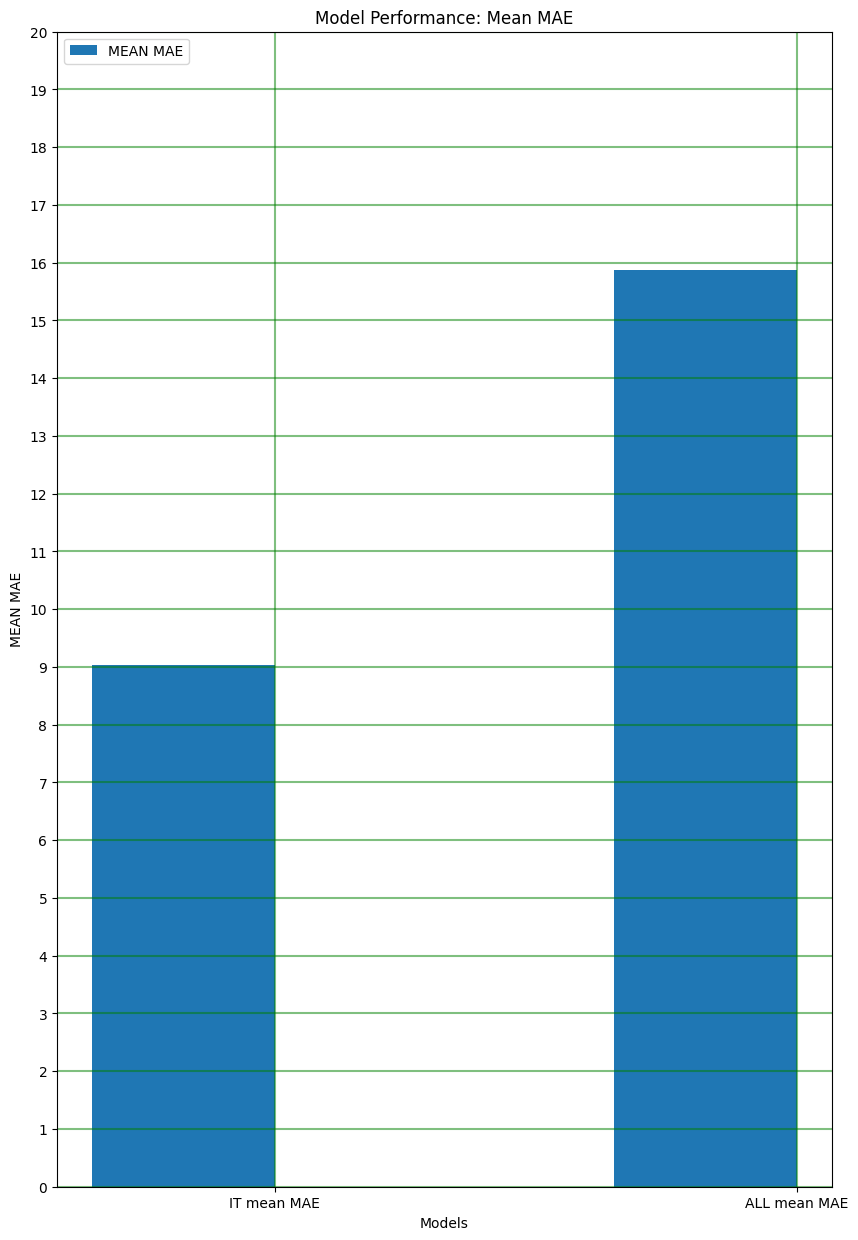

In [127]:
MEAN_AVG = [scores2.mean(),scores.mean()]
labels_mean = ['IT mean MAE', 'ALL mean MAE']

rg= np.arange(2)
width = 0.35

plt.figure(figsize=(10, 15))

plt.bar(rg, MEAN_AVG, width, label="MEAN MAE")
plt.xticks(rg + width/2, labels_mean)
plt.xlabel("Models")
plt.ylabel("MEAN MAE")
plt.ylim([0,1])

plt.yticks(np.arange(0, 20.1, 1))  # Specify the desired tick positions and labels
plt.yticks()
plt.ylim([0,20])

plt.grid(color='green', linewidth=1.5, axis='both', alpha=0.5)
plt.title('Model Performance: Mean MAE')
plt.legend(loc='upper left', ncol=2)
plt.show()